In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data/ElectricityByUtility.xlsx')

In [4]:
df.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Streetlight,Total Usage
0,Publicly owned utility,Alameda Municipal Power,1990,0.005775,127.509373,178.152884,22.041523,6.498777,125.998035,3.400883,463.607250
1,Publicly owned utility,"Anaheim, City of",1990,26.340150,903.225116,59.997184,637.678283,18.645329,526.666414,0.000000,2172.552476
2,Rural electric cooperative,"Anza Electric Cooperative, Inc.",1990,2.237929,7.666834,0.000000,0.000000,0.000000,18.149421,0.000000,28.054184
3,Investor owned utility,Avista Energy,1990,0.000000,14.310562,0.088855,0.077131,0.018470,8.875343,0.000000,23.370361
4,Publicly owned utility,Azusa Light and Water,1990,4.112401,53.672617,9.004819,58.636874,2.865891,61.318332,0.380032,189.990966


In [6]:
df.columns

Index(['Utility Type', 'Utility Name', 'Year', 'Ag & Water Pump',
       'Commercial Building', 'Commercial Other', 'Industry',
       'Mining & Construction', 'Residential', 'Streetlight', 'Total Usage'],
      dtype='object')

In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Utility Type             0
Utility Name             0
Year                     0
Ag & Water Pump          0
Commercial Building      0
Commercial Other         0
Industry                 0
Mining & Construction    0
Residential              0
Streetlight              0
Total Usage              0
dtype: int64


In [10]:
# Data Analysis
# Calculate the total usage for each utility name
total_usage_per_utility = df.groupby('Utility Name')['Total Usage'].sum().reset_index()

# Calculate the average total usage per year
average_total_usage_per_year = df.groupby('Year')['Total Usage'].mean().reset_index()

# Find the utility with the highest total usage
utility_highest_total_usage = total_usage_per_utility.loc[total_usage_per_utility['Total Usage'].idxmax()]

# Solution for Energy Efficiency
# Identify areas with high energy usage and propose efficiency measures
high_energy_usage_areas = df[['Ag & Water Pump', 'Commercial Building', 'Commercial Other', 'Industry', 'Mining & Construction', 'Residential', 'Streetlight']].sum().idxmax()

# Display results
print("\nTotal usage per utility:")
display(total_usage_per_utility)

print("\nAverage total usage per year:")
display(average_total_usage_per_year)

print(f"\nUtility with the highest total usage: {utility_highest_total_usage['Utility Name']} ({utility_highest_total_usage['Total Usage']} total usage)")

print(f"\nArea with the highest energy usage: {high_energy_usage_areas}")


Total usage per utility:


,Utility Name,Total Usage
0,Alameda Municipal Power,12817.776506
1,"Anaheim, City of",77948.821447
2,"Anza Electric Cooperative, Inc.",1462.508474
3,Avista Energy,23.370361
4,Azusa Light and Water,7641.307209
...,...,...
64,USBR WAPA Central Valley Project,91048.318687
65,"Ukiah, City of",3472.454273
66,Valley Electric Association,257.989283
67,"Vernon, City of",36750.685456



Average total usage per year:


,Year,Total Usage
0,1990,4489.724179
1,1991,4363.951295
2,1992,4439.365631
3,1993,4421.590413
4,1994,4400.602459
5,1995,4398.932042
6,1996,4475.993591
7,1997,4620.882332
8,1998,4573.868279
9,1999,4816.311669



Utility with the highest total usage: Southern California Edison Company (2678134.667068 total usage)

Area with the highest energy usage: Commercial Building


In [12]:
summary_stats = df.describe().T
print(summary_stats)

                        count         mean           std          min  \
Year                   1951.0  2006.805228      9.392850  1990.000000   
Ag & Water Pump        1951.0   324.117154   1155.695405     0.000000   
Commercial Building    1951.0  1597.227070   5457.955249     0.000000   
Commercial Other       1951.0   247.101334    782.098566     0.000000   
Industry               1951.0   730.864324   2451.827433     0.000000   
Mining & Construction  1951.0   123.319078    436.294459     0.000000   
Residential            1951.0  1420.976486   5139.292337     0.000000   
Streetlight            1951.0    25.138451     93.288017    -0.004100   
Total Usage            1951.0  4468.743896  14807.841739     0.005519   

                               25%          50%          75%           max  
Year                   1999.000000  2007.000000  2015.000000   2022.000000  
Ag & Water Pump           0.038082     4.235360    33.817731  10016.453824  
Commercial Building      16.033863   1

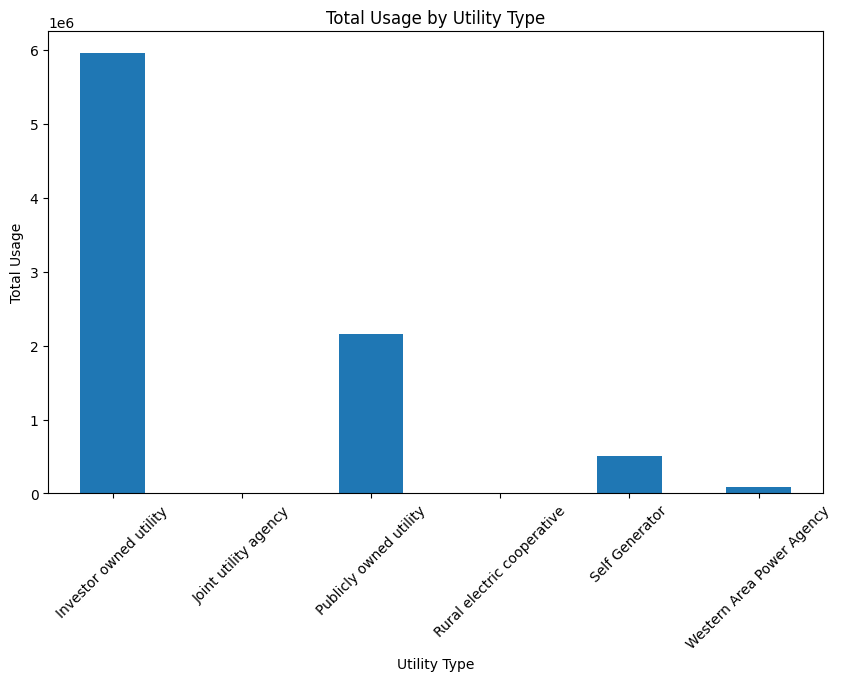

In [14]:
utility_type_usage = df.groupby('Utility Type')['Total Usage'].sum()

plt.figure(figsize=(10, 6))
utility_type_usage.plot(kind='bar')
plt.xlabel('Utility Type')
plt.ylabel('Total Usage')
plt.title('Total Usage by Utility Type')
plt.xticks(rotation=45)
plt.show()


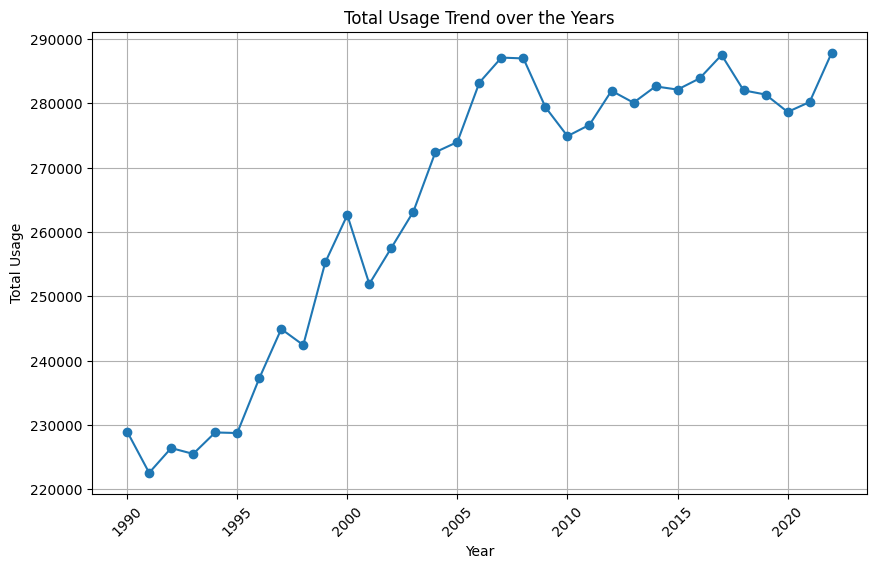

In [16]:
yearly_total_usage = df.groupby('Year')['Total Usage'].sum()

plt.figure(figsize=(10, 6))
yearly_total_usage.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Usage')
plt.title('Total Usage Trend over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

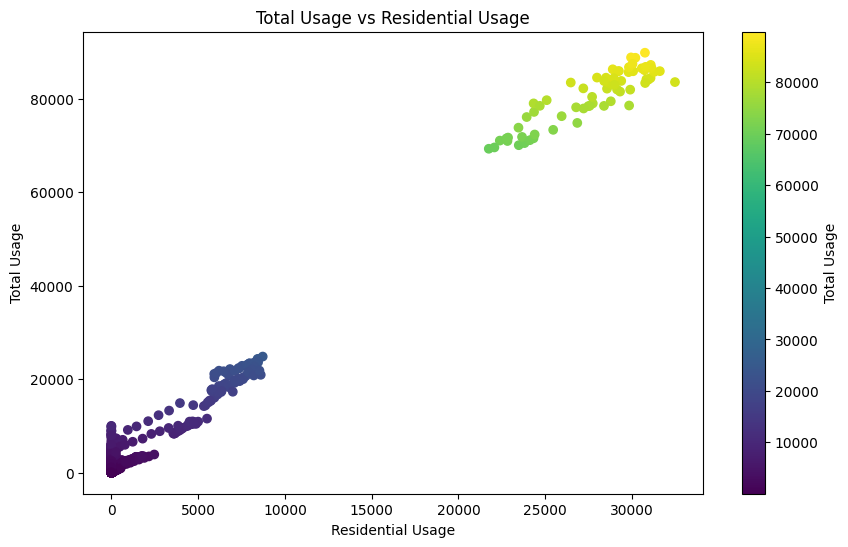

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Residential'], df['Total Usage'], c=df['Total Usage'], cmap='viridis')
plt.xlabel('Residential Usage')
plt.ylabel('Total Usage')
plt.title('Total Usage vs Residential Usage')
plt.colorbar(label='Total Usage')
plt.show()